# Data 608 Final Project 
## by Violeta Stoyanova

This project aims to discover the relationship between parks/ play areas and rental pricing in New York City

## Datasets
Three datasets were used in this project:
### Directory of Play Areas 
https://data.cityofnewyork.us/City-Government/Play-Areas/8fhn-c4v3 

### Open Spaces/ Parks 
Planimetric basemap polygon layer containing open space features, such as courts, tracks, etc. including Parks. https://data.cityofnewyork.us/Recreation/Open-Space-Parks-/g84h-jbjm

### DOF: Condominium comparable rental income – Manhattan 
https://data.cityofnewyork.us/Housing-Development/DOF-Condominium-comparable-rental-income-Manhattan/ikqj-pyhc




In [144]:
import pandas as pd
import numpy as np

## mapping 
import seaborn as sns
from shapely.geometry import Point, Polygon
import folium
import branca ## for color map
import geopandas as gpd
import geojsonio

# Matplotlib and plotly modules
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
%matplotlib inline

In [24]:
#loading the data
parks= pd.read_csv('C:\\Users\\Violet\\Desktop\\Data608\\PARK.csv')
parks.head(10)


,PARK_NAME,the_geom,FEAT_CODE,SOURCE_ID,SUB_CODE,LANDUSE,PARKNUM,STATUS,SYSTEM,SHAPE_Leng,SHAPE_Area
0,Commodore Barry Park,MULTIPOLYGON (((-73.97922375065221 40.69799879...,4910,21491000001,491050,Community Park,B021,Updated,NaN,829.420107,4.153980e+04
1,Pierrepont Playground,MULTIPOLYGON (((-73.99732028095745 40.69600764...,4980,21498000002,498000,Neighborhood Park,B222,Unchanged,NaN,607.555193,2.196049e+04
2,Cobble Hill Park,MULTIPOLYGON (((-73.9955741991998 40.687929182...,4980,21498000003,498000,Neighborhood Park,B326,Unchanged,NaN,784.421990,2.807908e+04
3,Commodore Barry Park,MULTIPOLYGON (((-73.97746661925957 40.69650941...,4980,21498000004,498000,Community Park,B021,Unchanged,NaN,2672.710150,4.384161e+05
4,Brooklyn Heights Promenade,MULTIPOLYGON (((-73.99746719287955 40.69692380...,4980,21498000005,498000,Triangle/Plaza,B223DG,Unchanged,NaN,1376.106398,1.446570e+04
5,Trinity Park,MULTIPOLYGON (((-73.98416407196115 40.69903067...,4980,21498000015,498000,Parkway,B223K,Unchanged,NaN,1218.559821,5.451044e+04
6,Trinity Park,MULTIPOLYGON (((-73.98361802247713 40.69873414...,4980,21498000016,498000,Parkway,B223K,Unchanged,NaN,792.633641,9.379272e+03
7,Bridge Park,MULTIPOLYGON (((-73.9844478739029 40.699929802...,4980,21498000066,498000,Recreation Field/Courts,B223JC,Unchanged,NaN,746.960771,2.501331e+04
8,Pelham Bay Golf Course,MULTIPOLYGON (((-73.7983614636537 40.884024185...,4940,15494000596,494000,NaN,X039,Unchanged,X039-GLF0012,13620.004188,9.836660e+06
9,Brooklyn Heights Promenade,MULTIPOLYGON (((-73.99830711319798 40.69531715...,4980,21498000006,498000,Triangle/Plaza,B223DK,Unchanged,NaN,3484.486788,4.635878e+04


In [25]:
parks.shape

(12491, 11)

In [26]:
parks['PARK_NAME']

0                           Commodore Barry Park
1                          Pierrepont Playground
2                               Cobble Hill Park
3                           Commodore Barry Park
4                     Brooklyn Heights Promenade
5                                   Trinity Park
6                                   Trinity Park
7                                    Bridge Park
8                         Pelham Bay Golf Course
9                     Brooklyn Heights Promenade
10                          Brooklyn Bridge Park
11                          Commodore Barry Park
12                          Commodore Barry Park
13                           Golconda Playground
14                           Golconda Playground
15                            Fort Stirling Park
16                             Walt Whitman Park
17                    Brooklyn Heights Promenade
18                           Golconda Playground
19                                  Trinity Park
20                  

In [87]:
parks = gpd.read_file('C:\\Users\\Violet\\Desktop\\Data608\\parks.geojson')
print(parks.head())


      shape_area system            landuse     shape_leng parknum  \
0  41539.8013629   None     Community Park  829.420106841    B021   
1  21960.4949197   None  Neighborhood Park  607.555193338    B222   
2  28079.0762647   None  Neighborhood Park   784.42199003    B326   
3  438416.114511   None     Community Park  2672.71014961    B021   
4   14465.699799   None     Triangle/Plaza  1376.10639843  B223DG   

                    park_name feat_code     status sub_code    source_id  \
0        Commodore Barry Park      4910    Updated   491050  21491000001   
1       Pierrepont Playground      4980  Unchanged   498000  21498000002   
2            Cobble Hill Park      4980  Unchanged   498000  21498000003   
3        Commodore Barry Park      4980  Unchanged   498000  21498000004   
4  Brooklyn Heights Promenade      4980  Unchanged   498000  21498000005   

                                            geometry  
0  (POLYGON ((-73.97922375065221 40.6979987936995...  
1  (POLYGON ((-73.

In [88]:
print(type(parks))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [42]:
#exploring the GeoDataFrame
parks.bounds


,minx,miny,maxx,maxy
0,-73.980079,40.697563,-73.979220,40.698089
1,-73.997912,40.696003,-73.997271,40.696543
2,-73.996566,40.687929,-73.995447,40.688474
3,-73.980388,40.696464,-73.977462,40.698128
4,-73.997731,40.696521,-73.996847,40.698266
5,-73.984996,40.698457,-73.983313,40.699234
6,-73.984524,40.698734,-73.983615,40.699539
7,-73.985219,40.699924,-73.984383,40.700504
8,-73.810177,40.873340,-73.794547,40.885621
9,-73.998383,40.695317,-73.996162,40.699744


In [89]:
parks.centroid

0        POINT (-73.97965893546386 40.69782786519898)
1        POINT (-73.99756424299936 40.69626750584809)
2        POINT (-73.99599391499882 40.68820966862224)
3          POINT (-73.9789403213953 40.6972984676388)
4        POINT (-73.99728408450673 40.69739795110565)
5        POINT (-73.98420919951224 40.69873405251121)
6        POINT (-73.98420901299077 40.69921071574028)
7        POINT (-73.98469222869009 40.70028247528273)
8         POINT (-73.8021227039262 40.87940403608889)
9        POINT (-73.99731900036942 40.69751606641125)
10       POINT (-73.99883564863443 40.69808001340596)
11       POINT (-73.98013666690935 40.69803187170462)
12       POINT (-73.98025032570372 40.69803737557642)
13       POINT (-73.98238751766712 40.69814539978807)
14       POINT (-73.98249251516982 40.69815016602958)
15       POINT (-73.99655688435703 40.69851102833611)
16       POINT (-73.98935502088005 40.69822431252197)
17        POINT (-73.9965570013869 40.69886418976709)
18       POINT (-73.98239748

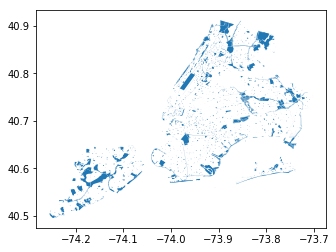

In [90]:
ax = parks.plot(alpha=1)

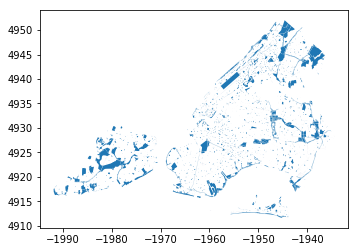

In [91]:
original = dict(ellps='WGS84', datum='WGS84', proj='longlat')

parks.crs = original

target = dict(ellps='WGS84', datum='WGS84', proj='utm', zone=23, units='km', no_defs=True)

ax = parks.to_crs(crs=target).plot(alpha=1)

C:\Users\Violet\Anaconda3\lib\site-packages\geopandas\plotting.py:389: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


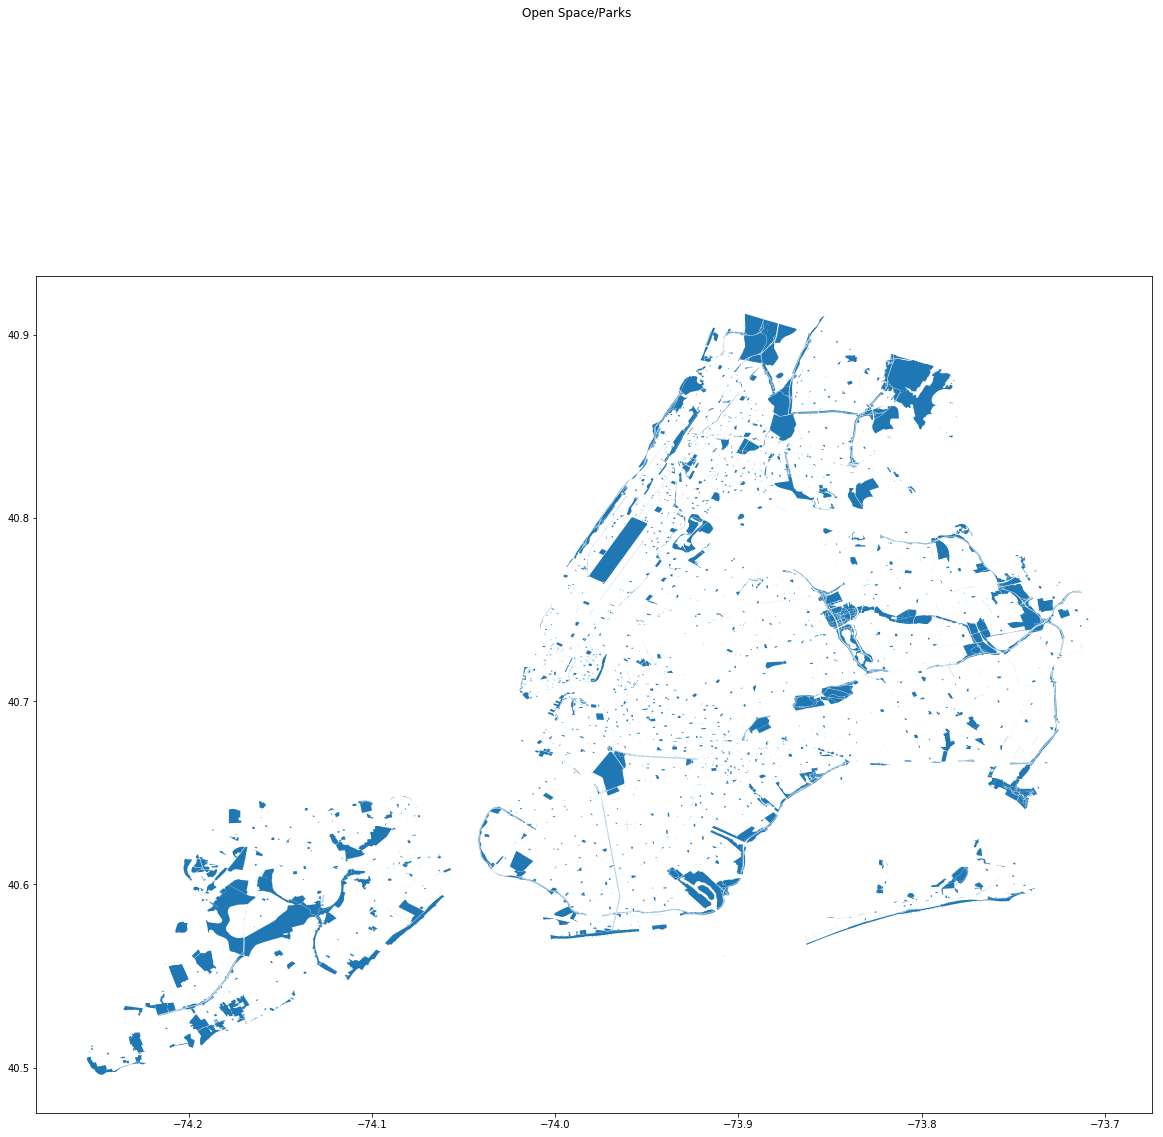

In [92]:
f, ax = plt.subplots(1, figsize=(20, 20))
ax = parks.plot(axes=ax)
f.suptitle('Open Space/Parks')
plt.show()

After visualizing the geospatial data of Open Space/Parks we can observe that most parks are located in Staten Island,Brooklyn,Queens and Upper Manhattan. It would be interesting once we look into the condominium data to see how are prices affected from parks location. 

In [93]:
play = gpd.read_file('C:\\Users\\Violet\\Desktop\\Data608\\Play Areas.geojson')
play.info()
print(play.head())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 6 columns):
shape_area    2856 non-null object
gispropnum    2856 non-null object
park_name     2856 non-null object
borough       2856 non-null object
shape_len     2856 non-null object
geometry      2856 non-null object
dtypes: object(6)
memory usage: 134.0+ KB
      shape_area gispropnum           park_name borough      shape_len  \
0   1983.7061603       Q422         PS 225 PLGD  Queens  194.613221922   
1  1167.95482056       Q422         PS 225 PLGD  Queens  140.483189139   
2  1359.66193153       Q422         PS 225 PLGD  Queens  149.694291441   
3  2336.15089727       Q389  JHS 180 PLAYGROUND  Queens  252.301996613   
4  1528.09174232       Q389  JHS 180 PLAYGROUND  Queens  193.469879107   

                                            geometry  
0  (POLYGON ((-73.83082674147332 40.5805963838381...  
1  (POLYGON ((-73.83128631928386 40.5805165265345...  
2  (POLYGON ((-73.830937

In [94]:
print(type(play))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [95]:

play.bounds 

,minx,miny,maxx,maxy
0,-73.830982,40.580584,-73.830763,40.580738
1,-73.831286,40.580438,-73.831120,40.580558
2,-73.831127,40.580496,-73.830938,40.580624
3,-73.824983,40.584751,-73.824663,40.584892
4,-73.824976,40.585041,-73.824768,40.585183
5,-73.809739,40.588000,-73.809558,40.588163
6,-73.809675,40.588339,-73.809558,40.588429
7,-73.805930,40.589120,-73.805822,40.589189
8,-73.805763,40.589117,-73.805616,40.589209
9,-73.789198,40.589118,-73.788845,40.589305


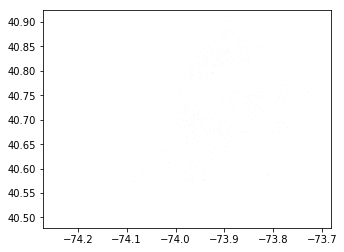

In [96]:
ax = play.plot(alpha=1) #the play areas would not appear on the graph

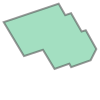

In [97]:
play.loc[0, 'geometry']

C:\Users\Violet\Anaconda3\lib\site-packages\geopandas\plotting.py:389: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


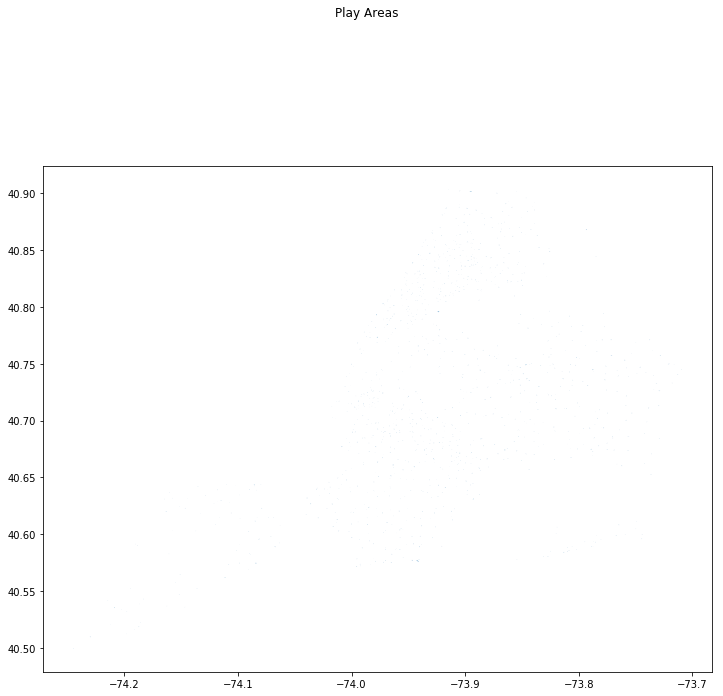

In [98]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = play.plot(axes=ax)
f.suptitle('Play Areas')
plt.show()

In [103]:
con_df = pd.read_csv('C:\\Users\\Violet\\Desktop\\Data608\\condo.csv')
con_df.head()

,MANHATTAN CONDOMINIUM PROPERTY Boro-Block-Lot,MANHATTAN CONDOMINIUM PROPERTY Condo Section,MANHATTAN CONDOMINIUM PROPERTY Address,Borough,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,...,COMPARABLE RENTAL 2 Neighborhood,COMPARABLE RENTAL 2 Building Classification,COMPARABLE RENTAL 2 Total Units,COMPARABLE RENTAL 2 Year Built,COMPARABLE RENTAL 2 Gross SqFt,COMPARABLE RENTAL 2 Est. Gross Income,COMPARABLE RENTAL 2 Gross Income per SqFt,COMPARABLE RENTAL 2 Full Market Value,COMPARABLE RENTAL 2 Market Value per SqFt,COMPARABLE RENTAL 2 Dist. from Coop in miles
0,1-00007-7501,735-R1,1 COENTIES SLIP,1,10004.0,40.703627,-74.010607,1.0,1.0,9.0,...,FINANCIAL,D8-ELEVATOR,61.0,1929.0,57941.0,2260000.0,39.0,11100000.0,192.0,0.40
1,1-00008-7501,1822-R1,39 WHITEHALL STREET,1,10004.0,40.703037,-74.012969,1.0,1.0,9.0,...,CIVIC CENTER,D6-ELEVATOR,151.0,1999.0,139697.0,7168000.0,51.0,35200000.0,252.0,1.05
2,1-00015-7502,1557-R1,20 WEST STREET,1,10004.0,40.706358,-74.016151,1.0,1.0,13.0,...,FINANCIAL,D5-ELEVATOR,482.0,1929.0,390531.0,17218000.0,44.1,84500000.0,216.0,0.40
3,1-00016-7501,308-R1,377 RECTOR PLACE,1,10280.0,40.709506,-74.018002,1.0,1.0,31704.0,...,TRIBECA,D8-ELEVATOR,218.0,1998.0,239185.0,15723000.0,66.0,77200000.0,323.0,0.00
4,1-00016-7502,313-R1,320 ALBANY STREET,1,10280.0,40.710165,-74.016751,1.0,1.0,31704.0,...,TRIBECA,D8-ELEVATOR,218.0,1998.0,239185.0,15723000.0,66.0,77200000.0,323.0,0.00


In [104]:
#Removing NaN's
con_df = con_df.dropna()


In [105]:
#Renaming the long columns
columns = ['boro_block_lot', 'condo_section','address','borough','postcode','latitude',
 'longitude','community_board','council_district','census_tract','BIN','BBL', 'NTA',
 'neighborhood','building_classification','total_units','year_built','gross_sqft', 'gross_income',
 'gross_income_psqft','market_value','market_value_psqft','rent_1_boro_block_lot','rent_1_address','rent_1_neighborhood',
 'rent_1_building_classification','rent_1_total_units','rent_1_year_built','rent_1_gross_sqft','rent_1_gross_income',
 'rent_1_gross_income_psqft','rent_1_market_value','rent_1_market_value_psqft','rent_1_dist_from_coop_miles',
 'rent_2_boro_block_lot','rent_2_address','rent_2_neighborhood','rent_2_building_classification','rent_2_total_units',
 'rent_2_year_built','rent_2_gross_sqft','rent_2_gross_income','rent_2_gross_income_psqft','rent_2_market_value',
 'rent_2_market_alue_psqft','rent_2_dist_from_coop_miles']

In [106]:
con_df.columns = columns
print('Total number of comumns: {}'.format(len(con_df.columns)))

Total number of comumns: 46


In [132]:
con_df.columns


Index(['boro_block_lot', 'condo_section', 'address', 'borough', 'postcode',
       'latitude', 'longitude', 'community_board', 'council_district',
       'census_tract', 'BIN', 'BBL', 'NTA', 'neighborhood',
       'building_classification', 'total_units', 'year_built', 'gross_sqft',
       'gross_income', 'gross_income_psqft', 'market_value',
       'market_value_psqft', 'rent_1_boro_block_lot', 'rent_1_address',
       'rent_1_neighborhood', 'rent_1_building_classification',
       'rent_1_total_units', 'rent_1_year_built', 'rent_1_gross_sqft',
       'rent_1_gross_income', 'rent_1_gross_income_psqft',
       'rent_1_market_value', 'rent_1_market_value_psqft',
       'rent_1_dist_from_coop_miles', 'rent_2_boro_block_lot',
       'rent_2_address', 'rent_2_neighborhood',
       'rent_2_building_classification', 'rent_2_total_units',
       'rent_2_year_built', 'rent_2_gross_sqft', 'rent_2_gross_income',
       'rent_2_gross_income_psqft', 'rent_2_market_value',
       'rent_2_market_alu

In [107]:
#Process NTA name (remove white space)
con_df["NTA"] = con_df["NTA"].apply(lambda x: str(x).rstrip())

In [108]:
np.unique(list(con_df["NTA"]))

array(['Battery Park City-Lower Manhattan',
       'Central Harlem North-Polo Grounds', 'Central Harlem South',
       'Chinatown', 'Clinton', 'East Harlem North', 'East Harlem South',
       'East Village', 'Gramercy', 'Hamilton Heights',
       'Hudson Yards-Chelsea-Flatiron-Union Square',
       'Lenox Hill-Roosevelt Island', 'Lincoln Square', 'Lower East Side',
       'Marble Hill-Inwood', 'Midtown-Midtown South',
       'Morningside Heights', 'Murray Hill-Kips Bay',
       'SoHo-TriBeCa-Civic Center-Little Italy',
       'Turtle Bay-East Midtown', 'Upper East Side-Carnegie Hill',
       'Upper West Side', 'Washington Heights North',
       'Washington Heights South', 'West Village', 'Yorkville',
       'park-cemetery-etc-Manhattan'], dtype='<U42')

In [109]:
#basic statistics and data descripition
con_df.describe()

,borough,postcode,latitude,longitude,community_board,council_district,census_tract,BIN,BBL,total_units,...,rent_1_market_value_psqft,rent_1_dist_from_coop_miles,rent_2_total_units,rent_2_year_built,rent_2_gross_sqft,rent_2_gross_income,rent_2_gross_income_psqft,rent_2_market_value,rent_2_market_alue_psqft,rent_2_dist_from_coop_miles
count,1079.0,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1.079000e+03,1.079000e+03,1079.000000,...,1079.000000,1079.000000,1079.000000,1079.000000,1.079000e+03,1.079000e+03,1079.000000,1.079000e+03,1079.000000,1079.000000
mean,1.0,10027.708990,40.756733,-73.980404,5.385542,3.862836,1778.177016,1.050344e+06,1.010089e+09,94.370714,...,177.211001,0.440955,122.456905,1950.214087,1.205264e+05,4.860660e+06,37.861038,2.311813e+07,177.650046,0.462484
std,0.0,37.645877,0.030899,0.020128,3.366265,2.267725,5301.001818,3.066669e+04,5.475895e+06,125.554701,...,58.510899,0.516157,126.895775,36.747945,1.379590e+05,5.818910e+06,10.652920,2.831490e+07,60.815623,0.501278
min,1.0,10000.000000,40.703037,-74.018002,1.000000,1.000000,6.000000,1.000000e+06,1.000078e+09,11.000000,...,21.660000,0.000000,11.000000,1885.000000,6.385000e+03,1.198890e+05,10.430000,4.050000e+05,27.000000,0.000000
25%,1.0,10011.000000,40.732191,-73.996591,3.000000,2.000000,65.000000,1.019058e+06,1.005698e+09,23.000000,...,142.000000,0.150000,39.000000,1920.000000,3.344300e+04,1.057568e+06,31.200000,4.630000e+06,145.000000,0.200000
50%,1.0,10019.000000,40.755042,-73.981588,6.000000,4.000000,122.000000,1.052738e+06,1.010438e+09,48.000000,...,175.000000,0.350000,75.000000,1940.000000,6.753600e+04,2.357500e+06,37.800000,1.110000e+07,176.000000,0.350000
75%,1.0,10026.000000,40.778549,-73.965122,8.000000,5.500000,183.000000,1.080202e+06,1.014098e+09,117.000000,...,219.000000,0.550000,164.000000,1986.000000,1.564650e+05,6.170000e+06,44.250000,2.790000e+07,217.000000,0.600000
max,1.0,10280.000000,40.868948,-73.923221,64.000000,10.000000,31704.000000,1.089507e+06,1.022488e+09,1258.000000,...,365.000000,9.600000,1112.000000,2005.000000,1.588533e+06,3.654334e+07,75.000000,1.570000e+08,365.000000,9.200000


After removing NaN rows from condominium data, there are 1079 rows left. 

### Using Scatterplot to find relationships between the different variables 

C:\Users\Violet\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


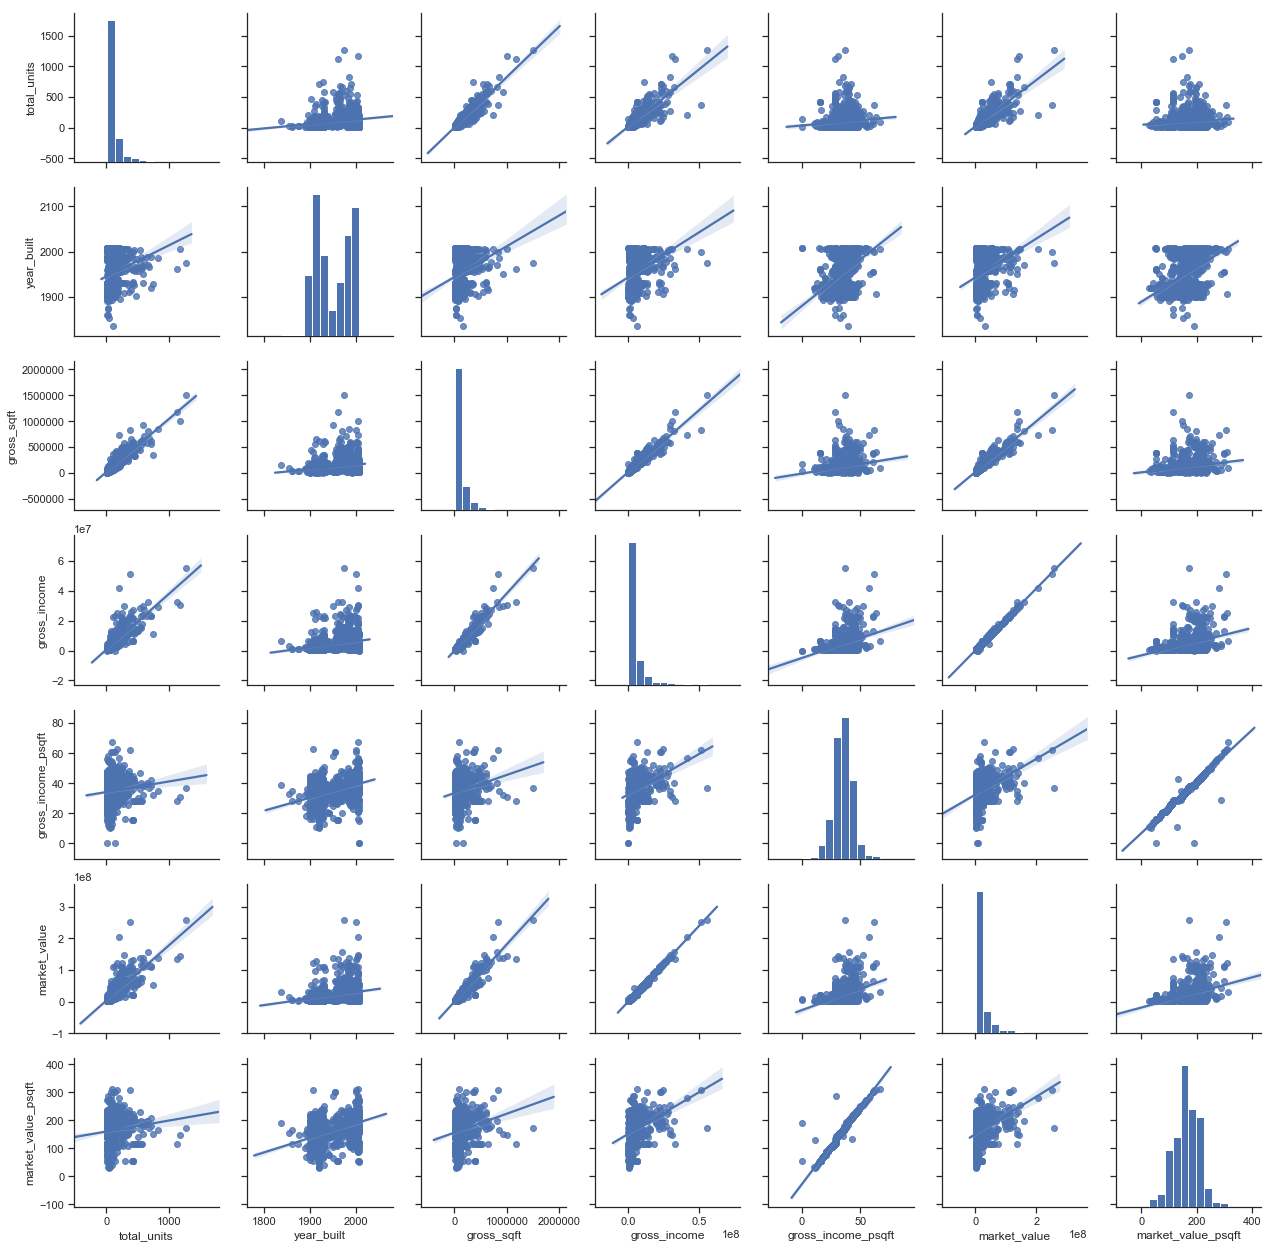

In [114]:
ana_cols = ['building_classification','total_units','year_built','gross_sqft', 'gross_income',
 'gross_income_psqft','market_value','market_value_psqft']
aa = con_df[ana_cols]

sns.set(style="ticks")
sns.pairplot(aa, kind="reg")
plt.show()

Most of the variables are correlated very well. For instance, gross income vs. market value, gross income from per square feet vs. market value per square fit have excellent and positive linear relationship. While gross sqft and market value, total units and market value, gross sqft and gross income, gross sqft and total units have the semi-perfect positive linear relationship. Some the variable pairs (year built and market value per sqft, year built, gross income, etc.) do not have any significant relationship.

## Mapping

In [157]:
con_df['latitude'] = con_df['latitude'].astype(float)
con_df['longitude'] = con_df['longitude'].astype(float)
con_df = con_df.dropna(axis=0, subset=['latitude','longitude'])

In [159]:
map_1= folium.Map(location=[40.773752, -73.972679], zoom_start = 12) ## ["Stamen Terrain", "Stamen Toner", "Mapbox Bright"]

housings_points = int(con_df['longitude'].describe()['count'])
for i in range(housings_points):
    # Other areas   
    latitude = con_df.iloc[i]['latitude']
    longitude = con_df.iloc[i]['longitude']
    
    folium.CircleMarker([latitude, longitude],
                        radius=2,
                        color='#FF0000',
                        fill_color='#FF0000').add_to(map_1)
map_1

The map shows the high concentaration of condominuims in Manhattan. 

In [151]:
nta = con_df.groupby('NTA', as_index = False).agg(np.mean)

nta_list = np.unique(list(nta['NTA']))

features = ['gross_income', 'gross_income_psqft', 'market_value', 'market_value_psqft']
    

def plot_NTA_rank(basis = np.mean):
    
    y_pos = np.arange(len(nta_list))

    fig = plt.figure(figsize=(15, 10))
    for i, feature in enumerate(features):

        market_value = list(nta[feature])

        values = sorted(zip(nta_list, market_value), key=lambda x: x[1] * 1)
        sorted_nta_list, sorted_market_value = zip(*values)

        plt.subplot(2,2,i+1)
        plt.barh(y_pos, sorted_market_value)
        plt.yticks(y_pos, sorted_nta_list, fontsize= 10)
        plt.ylabel('NTA')
        plt.title(str(feature.replace('MANHATTAN CONDOMINIUM PROPERTY', '')).title())

    plt.tight_layout()
    plt.show()

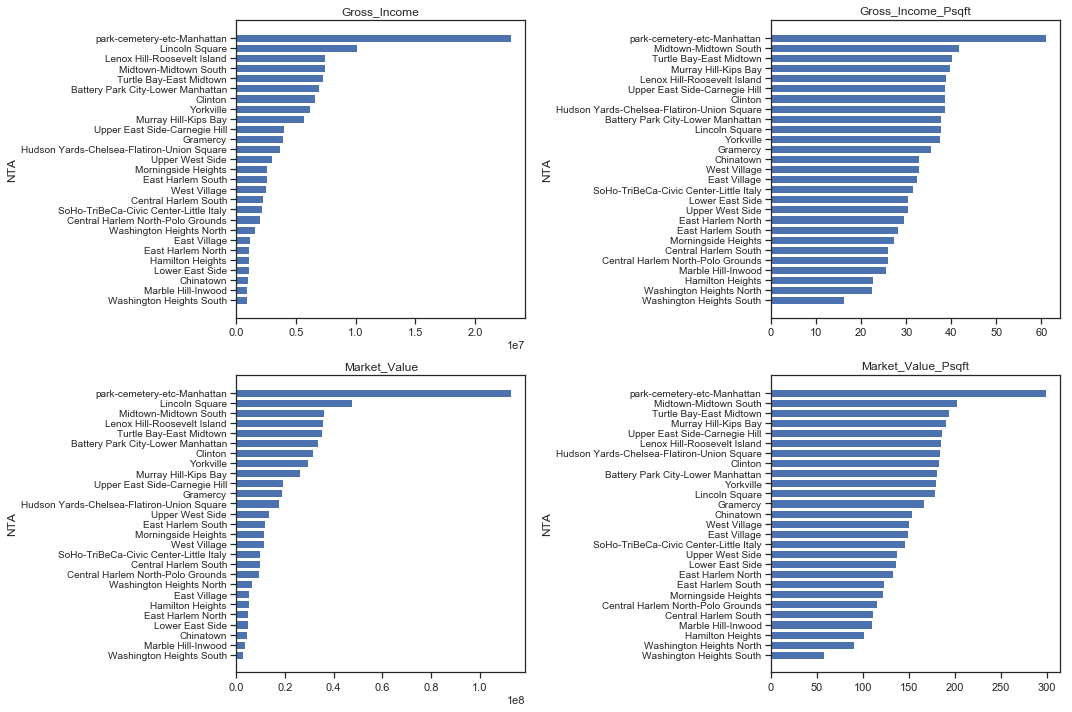

In [152]:
plot_NTA_rank()

In [155]:
feature = 'gross_income'
minc = nta[feature].describe()['min']
maxc = nta[feature].describe()['max']
colorscale = branca.colormap.ColorMap(minc, maxc)
        
def color_function(i):
    aa = nta.iloc[i][feature]
    cc = colorscale(float(aa))
    return cc
    

postcode_map = folium.Map(location=[40.773752, -73.972679],
                          tiles = "cartodbpositron", zoom_start = 13)
postcode_map.add_child(colorscale)
postcode_map